In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import os
import warnings
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
plt.rcParams['font.size'] = 20

os.chdir("../SNR_data/M1e6_mu1e1")
file_list = os.listdir()

In [5]:
import numpy as np
import glob

# # Step 1: Get all relevant filenames
files = glob.glob("*.npy")  # Adjust path as needed

# # Step 2: Extract and sort spin values
# spin_values = sorted(set(float(f.split("_")[-1].replace(".npy", "")) for f in files))

spin_values = np.concatenate([np.round(np.arange(0,1.0,0.1),3),np.array([0.99,0.998])])
# Step 3: Compute SNR ratios
SNR_ratios = []
ordered_spins = []  # To keep track of the order

for spin in spin_values:
    kerr_file = f"SNR_Kerr_vec_{spin}.npy"
    aak_file = f"SNR_AAK_vec_{spin}.npy"
 
    # Ensure both files exist before proceeding
    # print(file_list)
    if kerr_file in files or aak_file in file_list:

        SNR_Kerr = np.load(kerr_file)
        SNR_AAK = np.load(aak_file)

        # Compute ratio (avoid division by zero)
        # ratio = SNR_Kerr / np.where(SNR_AAK != 0, SNR_AAK, np.nan)
        ratio = SNR_AAK/SNR_Kerr

        SNR_ratios.append(ratio[0:])
        ordered_spins.append(spin)

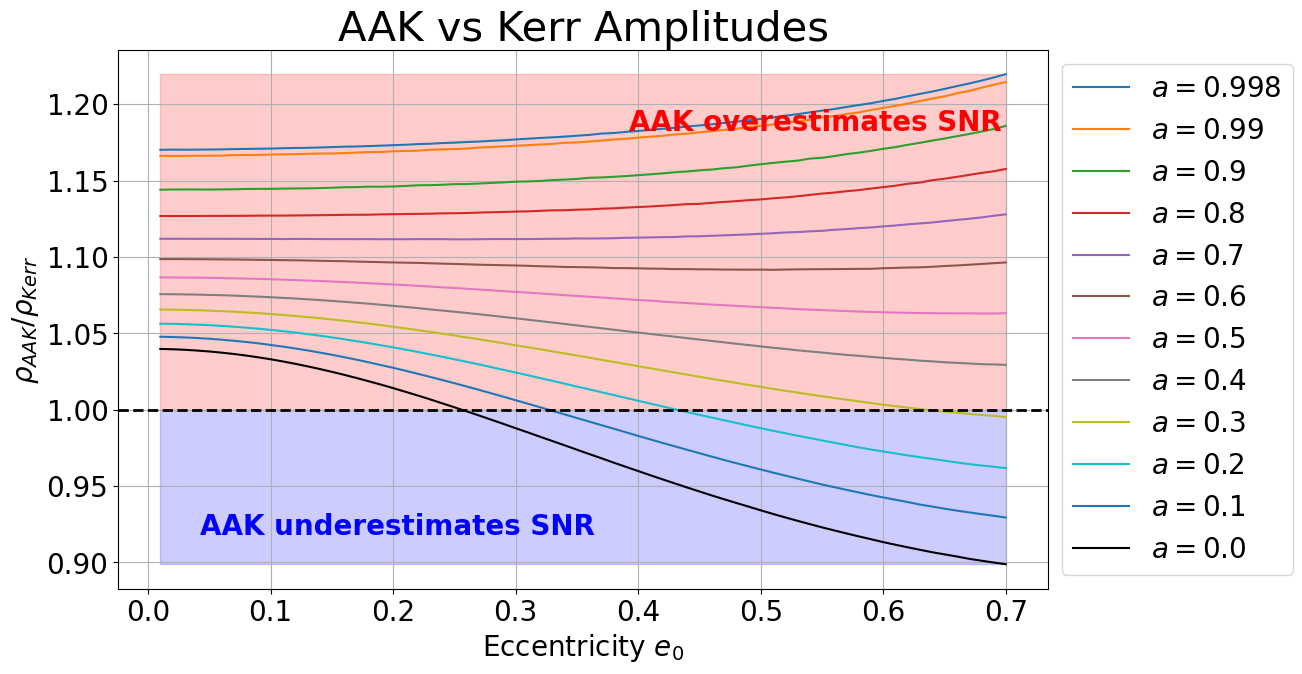

In [7]:
e0_vec = np.arange(0.01,0.71,0.01)
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Plot all SNR ratios
for j in range(-1 + len(ordered_spins), -1, -1):
    if j == 0:
        ax.plot(e0_vec, SNR_ratios[j], ms=20, c='black', label=rf'$a = {ordered_spins[j]}$')
    else:
        ax.plot(e0_vec, SNR_ratios[j], ms=20, label=rf'$a = {ordered_spins[j]}$')
        
    

# Add grid, labels, and title
ax.grid(True)
ax.set_xlabel(r'Eccentricity $e_0$', fontsize=20)
ax.set_ylabel(r'$\rho_{AAK}/\rho_{Kerr}$', fontsize=20)
ax.set_title(r'AAK vs Kerr Amplitudes', fontsize=30)

# Move legend outside the plot
ax.legend(bbox_to_anchor=(1.0, 1.0))

# --- Shaded Regions ---
ax.axhline(y=1.0, color="black", linestyle="--", linewidth=2)  # Horizontal line at y = 1.0

# Shade below y=1 (blue, faded)
ax.fill_between(e0_vec, np.min(np.min(SNR_ratios)), 1.0, color='blue', alpha=0.2)

# Shade above y=1 (red, faded)
ax.fill_between(e0_vec, 1.0, np.max(np.max(SNR_ratios)), color='red', alpha=0.2)

# --- Text Annotations ---
ax.text(
    0.75, 0.85, r"AAK overestimates SNR", color='red', fontweight='bold', fontsize=20, 
    horizontalalignment='center', transform=ax.transAxes
)
ax.text(
    0.3, 0.1, "AAK underestimates SNR", color='blue', fontweight='bold', fontsize=20, 
    horizontalalignment='center', transform=ax.transAxes,
)

plt.savefig("M1e6_mu1e1_AAK_vs_Kerr_Amp.png",bbox_inches = "tight")

plt.show()


In [8]:
os.chdir('../M1e7_mu1e2')

In [10]:
import numpy as np
import glob
e0_vec = np.arange(0.01,0.71,0.01)
# # Step 1: Get all relevant filenames
files = glob.glob("*.npy")  # Adjust path as needed

# # Step 2: Extract and sort spin values
# spin_values = sorted(set(float(f.split("_")[-1].replace(".npy", "")) for f in files))

spin_values = np.concatenate([np.round(np.arange(0,1.0,0.1),3),np.array([0.99,0.998])])
# Step 3: Compute SNR ratios
SNR_ratios = []
ordered_spins = []  # To keep track of the order

for spin in spin_values:
    kerr_file = f"SNR_Kerr_vec_{spin}.npy"
    aak_file = f"SNR_AAK_vec_{spin}.npy"
 
    # Ensure both files exist before proceeding
    # print(file_list)
    if kerr_file in file_list_M1e7_mu1e2 or aak_file in file_list_M1e7_mu1e2:
        print("Hello")
        SNR_Kerr = np.load(kerr_file)
        SNR_AAK = np.load(aak_file)

        # Compute ratio (avoid division by zero)
        # ratio = SNR_Kerr / np.where(SNR_AAK != 0, SNR_AAK, np.nan)
        ratio = SNR_AAK/SNR_Kerr

        SNR_ratios.append(ratio[0:])
        ordered_spins.append(spin)

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


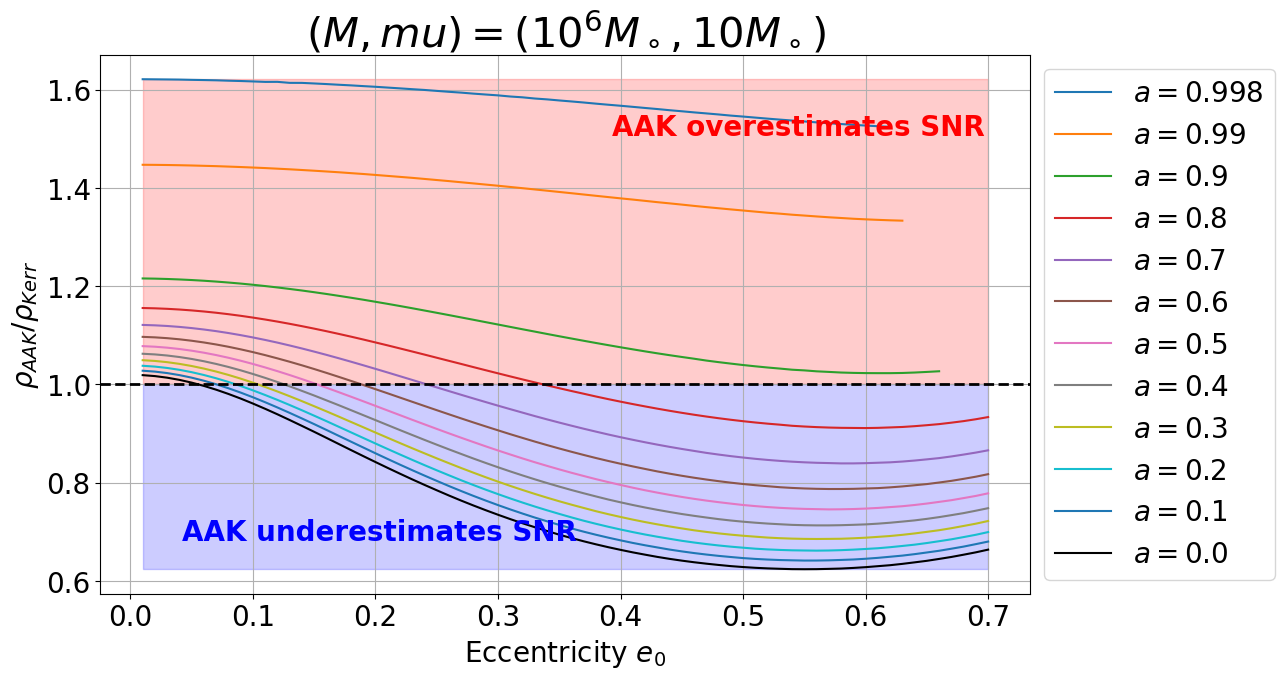

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Plot all SNR ratios
for j in range(-1 + len(ordered_spins), -1, -1):
    if j == 0:
        ax.plot(e0_vec[0:len(SNR_ratios[j])], SNR_ratios[j], ms=20, c='black', label=rf'$a = {ordered_spins[j]}$')
    else:
        ax.plot(e0_vec[0:len(SNR_ratios[j])], SNR_ratios[j], ms=20, label=rf'$a = {ordered_spins[j]}$')
        
    

# Add grid, labels, and title
ax.grid(True)
ax.set_xlabel(r'Eccentricity $e_0$', fontsize=20)
ax.set_ylabel(r'$\rho_{AAK}/\rho_{Kerr}$', fontsize=20)
ax.set_title(r'$(M, mu) = (10^6M_\circ, 10M_\circ)$', fontsize=30)

# Move legend outside the plot
ax.legend(bbox_to_anchor=(1.0, 1.0))

# --- Shaded Regions ---
ax.axhline(y=1.0, color="black", linestyle="--", linewidth=2)  # Horizontal line at y = 1.0

# Shade below y=1 (blue, faded)
ax.fill_between(e0_vec, np.min([np.min(arr) for arr in SNR_ratios]), 1.0, color='blue', alpha=0.2)

# Shade above y=1 (red, faded)
ax.fill_between(e0_vec, 1.0, np.max([np.max(arr) for arr in SNR_ratios]), color='red', alpha=0.2)

# --- Text Annotations ---
ax.text(
    0.75, 0.85, r"AAK overestimates SNR", color='red', fontweight='bold', fontsize=20, 
    horizontalalignment='center', transform=ax.transAxes
)
ax.text(
    0.3, 0.1, "AAK underestimates SNR", color='blue', fontweight='bold', fontsize=20, 
    horizontalalignment='center', transform=ax.transAxes,
)
plt.savefig("M1e7_mu1e2_AAK_vs_Kerr_Amp.png",bbox_inches = "tight")
plt.show()


In [12]:

os.chdir("../M1e5_mu1")

In [13]:
import numpy as np
import glob

# # Step 1: Get all relevant filenames
files = glob.glob("*.npy")  # Adjust path as needed

# # Step 2: Extract and sort spin values
# spin_values = sorted(set(float(f.split("_")[-1].replace(".npy", "")) for f in files))

spin_values = np.concatenate([np.round(np.arange(0,1.0,0.1),3),np.array([0.99,0.998])])
# Step 3: Compute SNR ratios
SNR_ratios = []
ordered_spins = []  # To keep track of the order

for spin in spin_values:
    print("Hello")
    kerr_file = f"SNR_Kerr_vec_{spin}.npy"
    aak_file = f"SNR_AAK_vec_{spin}.npy"
 
    # Ensure both files exist before proceeding
    # print(file_list)
    if kerr_file in files or aak_file in file_list:
        
        SNR_Kerr = np.load(kerr_file)
        SNR_AAK = np.load(aak_file)

        # Compute ratio (avoid division by zero)
        # ratio = SNR_Kerr / np.where(SNR_AAK != 0, SNR_AAK, np.nan)
        ratio = SNR_AAK/SNR_Kerr

        SNR_ratios.append(ratio[0:])
        ordered_spins.append(spin)

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


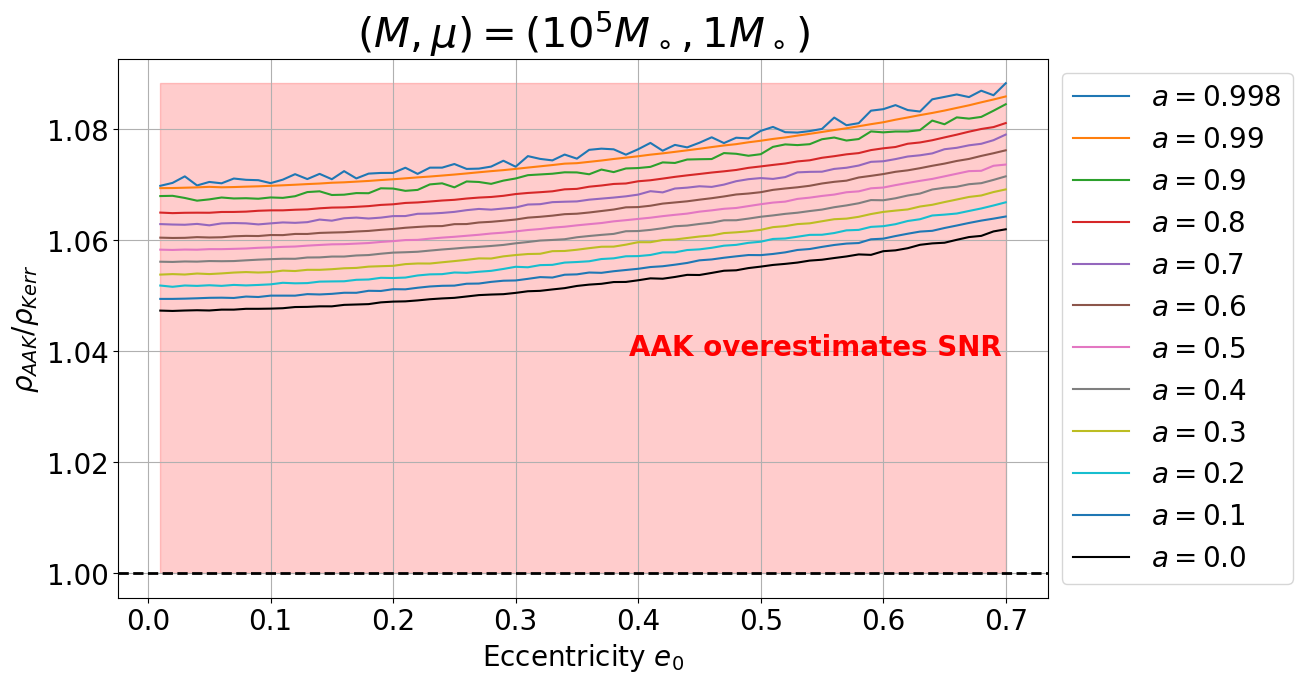

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Plot all SNR ratios
for j in range(-1 + len(ordered_spins), -1, -1):
    if j == 0:
        ax.plot(e0_vec[0:len(SNR_ratios[j])], SNR_ratios[j], ms=20, c='black', label=rf'$a = {ordered_spins[j]}$')
    else:
        ax.plot(e0_vec[0:len(SNR_ratios[j])], SNR_ratios[j], ms=20, label=rf'$a = {ordered_spins[j]}$')
        
    

# Add grid, labels, and title
ax.grid(True)
ax.set_xlabel(r'Eccentricity $e_0$', fontsize=20)
ax.set_ylabel(r'$\rho_{AAK}/\rho_{Kerr}$', fontsize=20)
ax.set_title(r'$(M, \mu) = (10^5M_\circ, 1M_\circ)$', fontsize=30)

# Move legend outside the plot
ax.legend(bbox_to_anchor=(1.0, 1.0))

# --- Shaded Regions ---
ax.axhline(y=1.0, color="black", linestyle="--", linewidth=2)  # Horizontal line at y = 1.0

# Shade below y=1 (blue, faded)
# ax.fill_between(e0_vec, np.min([np.min(arr) for arr in SNR_ratios]), 1.0, color='blue', alpha=0.2)

# Shade above y=1 (red, faded)
ax.fill_between(e0_vec, 1.0, np.max([np.max(arr) for arr in SNR_ratios]), color='red', alpha=0.2)

# --- Text Annotations ---
ax.text(
    0.75, 0.45, r"AAK overestimates SNR", color='red', fontweight='bold', fontsize=20, 
    horizontalalignment='center', transform=ax.transAxes
)
# ax.text(
#     0.3, 0.1, "AAK underestimates SNR", color='blue', fontweight='bold', fontsize=20, 
#     horizontalalignment='center', transform=ax.transAxes,
# )
# plt.savefig("M1e7_mu1e2_AAK_vs_Kerr_Amp.png",bbox_inches = "tight")
plt.show()


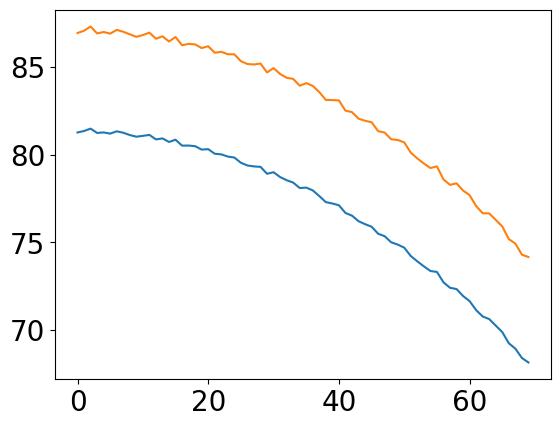

In [18]:
plt.plot(SNR_Kerr);plt.plot(SNR_AAK);plt.show()